In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
import json
import glob
import random
import collections
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import shutil
import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import keras
import json
import tensorflow as tf 
from keras.layers import Input
from keras import Sequential
from keras.layers import Dense, LSTM,Flatten, TimeDistributed, Conv2D, Dropout
from keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import load_model
from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D,Reshape, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten, UpSampling2D
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd

from skimage.io import imread
from skimage.transform import resize
from keras import layers
from keras import models
import keras
from keras.layers import LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

def get_f1(y_true, y_pred): #taken from old keras source code
    tp = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    tn = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    fp = K.sum(K.round(K.clip((1-y_true) * (y_pred), 0, 1)))
    fn = K.sum(K.round(K.clip((y_true) * (1-y_pred), 0, 1)))
    f1_val = tp / ( tp + ( (1/2) * (fp+fn) ) + K.epsilon())
    return f1_val

from glob import glob
trn='E:/D/PennA/Penn_Action/*/'
tr= glob(trn)

len(tr)

from PIL import Image
import numpy as np
import random

def discard_random_image(images):
    if len(images) == 3:
        idx_to_discard = 0
        images.pop(idx_to_discard)
        #print(np.shape(images))
        return np.concatenate((images[0], images[1]), axis=0)
    elif len(images) == 2:
        #print(np.shape(images))
        return np.concatenate((images[0], images[1]), axis=0)
    elif len(images) == 1:
        #print(np.shape(images))
        return images[0]
    elif len(images) > 3:
        middle = len(images) // 2
        left_part = images[:middle]
        right_part = images[middle:]
        return np.concatenate((discard_random_image(left_part), discard_random_image(right_part)), axis=0)

#q = discard_random_image(image_parts[15])

from PIL import Image
import numpy as np

def resize_images(q,target_size=(56, 56)):
    img = Image.fromarray(q)
    resized_img = img.resize((56,56), Image.ANTIALIAS)
    return resized_img

def discard_random_image(images):
    if len(images) == 3:
        idx_to_discard = 0
        images.pop(idx_to_discard)
        return np.concatenate((images[0], images[1]), axis=0)
    elif len(images) == 2:
        return np.concatenate((images[0], images[1]), axis=0)
    elif len(images) == 1:
        #print(np.shape(images))
        return images[0]
    elif len(images) > 3:
        middle = len(images) // 2
        left_part = images[:middle]
        right_part = images[middle:]
        return np.concatenate((discard_random_image(left_part), discard_random_image(right_part)), axis=0)

def prepare_videoes(image_paths, target_size=(56, 56)):
    images = []
    
    for path in image_paths:
        # Load image
        img = Image.open(path)
        
        # Convert to RGB if not already
        if img.mode != 'RGB':
            img = img.convert('RGB')
        
        # Resize the image
        img = img.resize(target_size, Image.ANTIALIAS)
        
        # Convert to numpy array
        img_array = np.array(img)
        
        # Append the processed image to the list
        images.append(img_array)
    
    num_images = len(images)
    num_parts = 16
    part_length = num_images // num_parts
    remaining = num_images % num_parts
    
    image_parts = []
    start_idx = 0
    
    for i in range(num_parts):
        end_idx = start_idx + part_length + (1 if i < remaining else 0)
        image_part = images[start_idx:end_idx]
        image_parts.append(image_part)
        start_idx = end_idx
    
    processed_parts = [discard_random_image(part) for part in image_parts]
    
    img_parts = [resize_images(part) for part in processed_parts]
    
    combined_image = np.zeros((224, 224, 3), dtype=np.uint8)
    
    for i, img_part in enumerate(img_parts):
        row = i // 4
        col = i % 4
        combined_image[row*56:(row+1)*56, col*56:(col+1)*56, :] = img_part
    
    return combined_image

#combined_image = prepare_videoes(vid)
#print("Combined image shape:", combined_image.shape)


In [2]:
from glob import glob
trn='E:/D/PennA/Penn_Action/*/'
tr= glob(trn)
len(tr)

train = []
val = []
test = []
train_y = []
val_y = []
test_y = []

y = 0
for i in tr:
    
    #print(i)
    x = glob(i+'/*/')
    
    #shuffle(x)
    t,tt = train_test_split( x , test_size=0.1, random_state=42)
    t, vv = train_test_split( t , test_size=0.1, random_state=42)
    
    for j in t:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
        
        train.append(j)
        train_y.append(y)
    
    for j in vv:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        val.append(j)
        val_y.append(y)
        
    for j in tt:
        
        mm = len(glob(j+'/*'))
        
        if(mm<10):
            continue
            
        test.append(j)
        test_y.append(y)
        
    y = y+1

from tensorflow.keras.utils import to_categorical
tra_y =  np.array(to_categorical(train_y))
va_y  =  np.array(to_categorical(val_y))
te_y  =  np.array(to_categorical(test_y))

(train, tra_y) = shuffle(train, tra_y)
(val, va_y) = shuffle(val, va_y)
(test, te_y) = shuffle(test, te_y)


def get_te(k , a) :
    x = glob(k+'/*')
    #print("..........................")
    #print(x)
    #print("..........................")
    imgdata=prepare_videoes(x)
    idata = np.array(imgdata)
    X_train = idata.astype('float32') / 255.
    #print("..........................")
    #print(np.shape(X_train))
    #print("..........................")
    return X_train

def get_cat(k) :
    return np.array(k)


class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    y_train = get_cat(batch_y)
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x]), np.array( y_train )


class My_Test_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , batch_size) :
    self.filename = filename
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x])

class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , labels, batch_size) :
    self.filename = filename
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]
    y_train = get_cat(batch_y)
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x]), np.array( y_train )


class My_Test_Generator(keras.utils.Sequence) :
  
  def __init__(self, filename , batch_size) :
    self.filename = filename
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.filename) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.filename[idx * self.batch_size : (idx+1) * self.batch_size]
    i=0
    return np.array([get_te(i,self.filename)for i in batch_x])


batch_size = 16
my_training_batch_generator = My_Custom_Generator(train, tra_y, batch_size)
my_validation_batch_generator = My_Custom_Generator(val, va_y, batch_size)


import numpy as np

# Initialize empty arrays to store training and validation data
X_train = []
Y_train = []
X_val = []
Y_val = []

batch_size = 16
num_train_samples = len(train)  # Number of training samples
num_val_samples = len(val)      # Number of validation samples

# Initialize your custom batch generators
my_training_batch_generator = My_Custom_Generator(train, tra_y, batch_size)
my_validation_batch_generator = My_Custom_Generator(val, va_y, batch_size)

# Load training data
for batch_idx in range(2):
    batch_images, batch_labels = my_training_batch_generator.__getitem__(batch_idx)
    X_train.append(batch_images)
    Y_train.append(batch_labels)

# Load any remaining training data (if num_train_samples is not a multiple of batch_size)
if num_train_samples % batch_size != 0:
    batch_images, batch_labels = my_training_batch_generator.__getitem__(num_train_samples // batch_size)
    X_train.append(batch_images[:num_train_samples % batch_size])
    Y_train.append(batch_labels[:num_train_samples % batch_size])

# Load validation data
for batch_idx in range(2):
    batch_images, batch_labels = my_validation_batch_generator.__getitem__(batch_idx)
    X_val.append(batch_images)
    Y_val.append(batch_labels)

# Load any remaining validation data (if num_val_samples is not a multiple of batch_size)
if num_val_samples % batch_size != 0:
    batch_images, batch_labels = my_validation_batch_generator.__getitem__(num_val_samples // batch_size)
    X_val.append(batch_images[:num_val_samples % batch_size])
    Y_val.append(batch_labels[:num_val_samples % batch_size])

# Concatenate the loaded batches into arrays
X_train = np.concatenate(X_train, axis=0)
Y_train = np.concatenate(Y_train, axis=0)
X_val = np.concatenate(X_val, axis=0)
Y_val = np.concatenate(Y_val, axis=0)

C:\Users\shaif\AppData\Local\Temp\ipykernel_9236\3181941758.py:158: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)
C:\Users\shaif\AppData\Local\Temp\ipykernel_9236\3181941758.py:127: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  resized_img = img.resize((56,56), Image.ANTIALIAS)


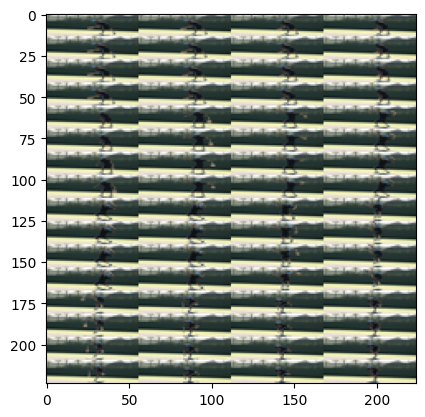

In [6]:
img = X_train[0]
plt.imshow(img)

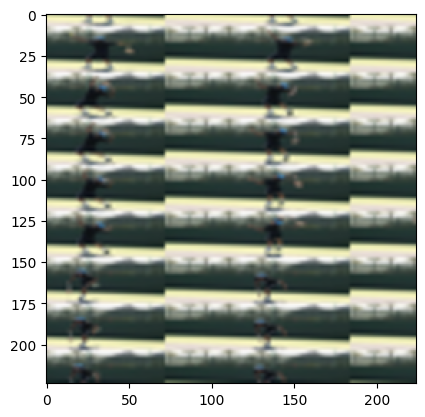

In [10]:
BATCH_SIZE = 8
# Width and height of image
IMAGE_SIZE = 224

class Augmentation(keras.layers.Layer):

    def __init__(self):
        super().__init__()

    @tf.function
    def random_execute(self, prob: float) -> bool:
        return tf.random.uniform([], minval=0, maxval=1) < prob
    
class RandomResizedCrop(Augmentation):

    def __init__(self, image_size):
        super().__init__()
        self.image_size = image_size

    def call(self, x: tf.Tensor) -> tf.Tensor:

        rand_size = int(0.5 * self.image_size)

        crop = tf.image.random_crop(x, (rand_size, rand_size, 3))
        crop_resize = tf.image.resize(crop, (self.image_size, self.image_size))
        return crop_resize
    
random_resized_crop = RandomResizedCrop(IMAGE_SIZE)

output_img = random_resized_crop.call(img)

plt.imshow(output_img)